In [5]:
from os import makedirs
from os.path import basename, dirname, exists, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import sys

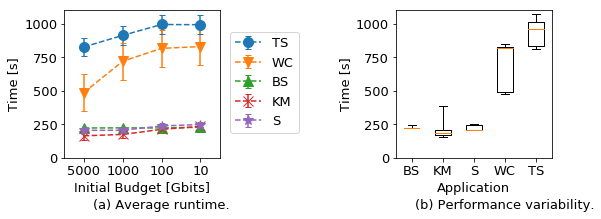

In [6]:


apps = ["BS", "KM", "S", "WC", "TS"]
budgets = [5000, 1000, 100, 10]

filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig16/'))

def load_data(filename):
	df = pd.read_csv(join(inputdir, filename), sep = ",", names=["app", "time", "budget"])
	return df
	
def get_avg_per_budget(app_df):
	result = []
	for budget in budgets:
		runtimes = app_df.loc[app_df["budget"] == budget]
		result.append(np.mean(runtimes["time"]))
	return result
		
def get_apps(df):
	result = dict()
	result2 = []
	for app in apps:
		app_df = df.loc[df["app"] == app]
		app_res = list(app_df["time"])
		app_budget = get_avg_per_budget(app_df)
		result[app] = app_budget
		result2.append(app_res)
	return result, result2
	
font = {'size': 13}
matplotlib.rc('font', **font)
	
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 3))

data = load_data("HiBench-Budget-AWS.csv")
app_runtime, app_runtime2 = get_apps(data)

#print(app_runtime)

ox_points = [1, 2, 3, 4]

ax[0].errorbar(ox_points, app_runtime["TS"], yerr=np.std(app_runtime["TS"]), capsize=3, marker='o', linestyle='dashed', markersize=10, label="TS")
ax[0].errorbar(ox_points, app_runtime["WC"], yerr=np.std(app_runtime["WC"]), capsize=3, marker='v', linestyle='dashed', markersize=10, label="WC")
ax[0].errorbar(ox_points, app_runtime["BS"], yerr=np.std(app_runtime["BS"]), capsize=3, marker='^', linestyle='dashed', markersize=10, label="BS")
ax[0].errorbar(ox_points, app_runtime["KM"], yerr=np.std(app_runtime["KM"]), capsize=3, marker='x', linestyle='dashed', markersize=10, label="KM")
ax[0].errorbar(ox_points, app_runtime["S"], yerr=np.std(app_runtime["S"]), capsize=3, marker='*', linestyle='dashed', markersize=10, label="S")


ax[0].set_xlabel("Initial Budget [Gbits]")
ax[0].set_ylabel("Time [s]")
ax[1].set_xlabel("Application")
ax[1].set_ylabel("Time [s]")

ax[0].set_xlim(0.5, 4.5)
ax[0].set_xticks(ox_points)
ax[0].set_xticklabels(["5000", "1000", "100", "10"])
ax[0].set_ylim(0, 1100)
ax[0].set_yticks(np.arange(0, 1100, 250))

ax[0].legend(ncol=1,bbox_to_anchor=(1.55, 0.9))

#print(app_runtime2)
ax[1].boxplot(app_runtime2, whis=[0,100])
ax[1].set_ylim(0, 1100)
ax[1].set_yticks(np.arange(0, 1100, 250))
ax[1].set_xlim(0.5, 5.5)
ax[1].set_xticks([1, 2, 3, 4, 5])
ax[1].set_xticklabels(apps)

ax[0].text(1.25, -380, "(a) Average runtime.")
ax[1].text(1.1, -380, "(b) Performance variability.")

plt.tight_layout()

plt.show()